### DAY8 最終発表
- 氏名：俵謙介(@k.tawara)
- 選んだ課題：kc_house_data.csv
- 目的：住居販売価格を予測する

#### 中間発表で参考になったこと
- 対数化すると精度が上がる

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

df = pd.read_csv('../../day1/1_data/kc_house_data.csv')

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [6]:
display(df.head())
display(df.tail())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB
None


欠測値なし。

In [8]:
print("Data shape: {}" .format(df.shape))

Data shape: (21613, 21)


データポイント数：21613, 特徴量の数：21

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


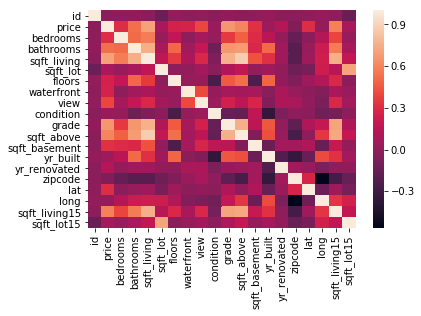

In [10]:
#seabornでヒートマップを見てみる
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [11]:
#別の方法でヒートマップを確認
df.corr().style.background_gradient().format('{:.2f}')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


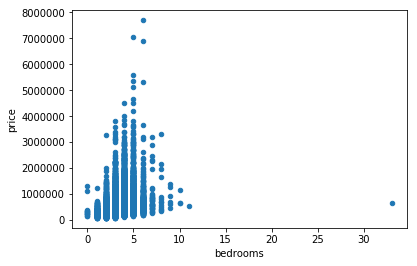

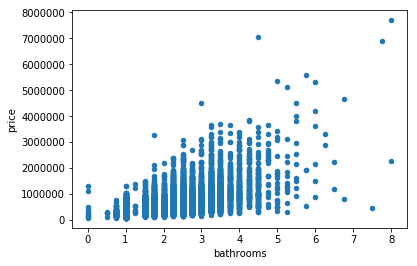

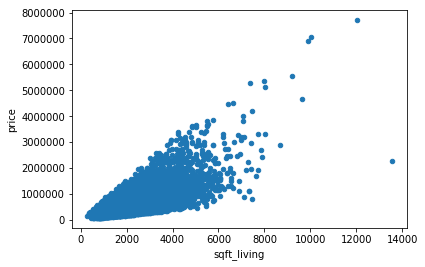

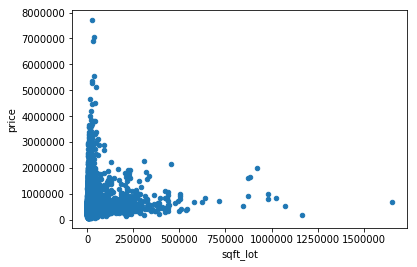

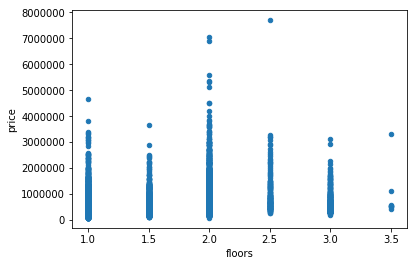

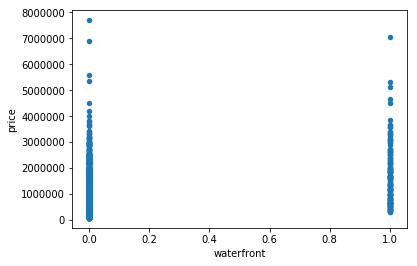

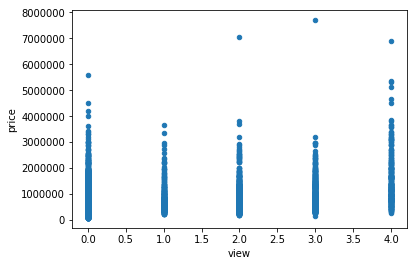

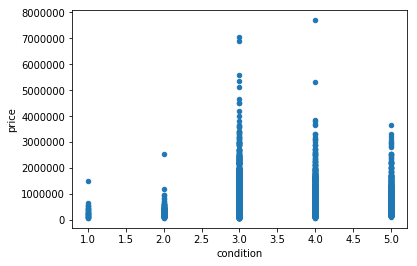

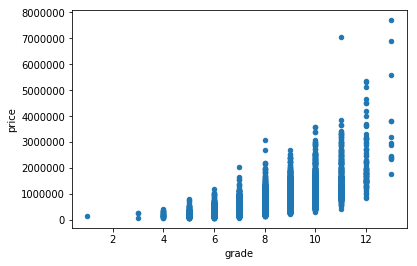

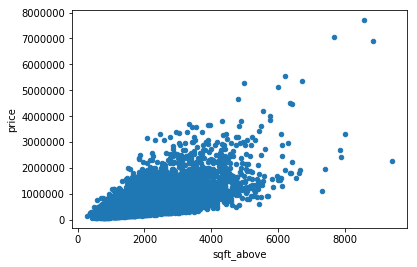

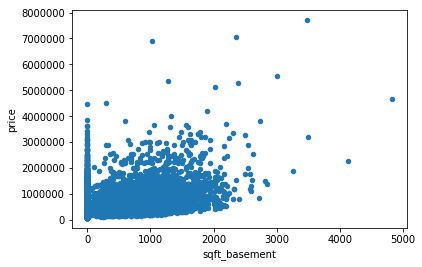

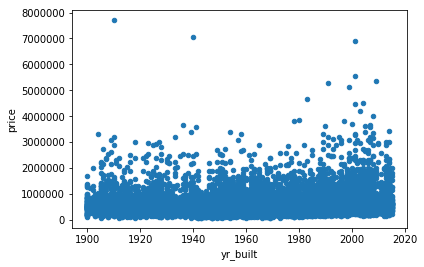

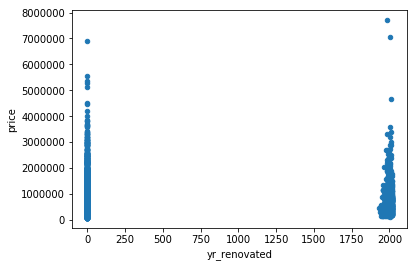

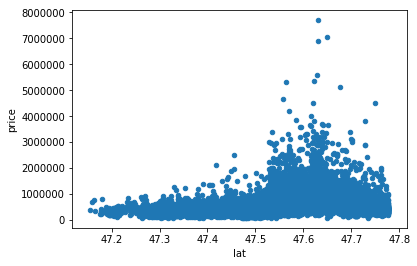

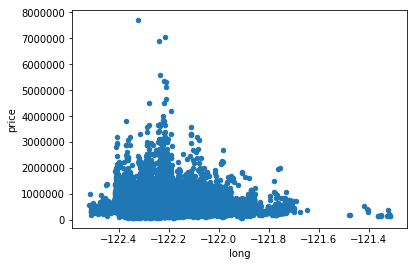

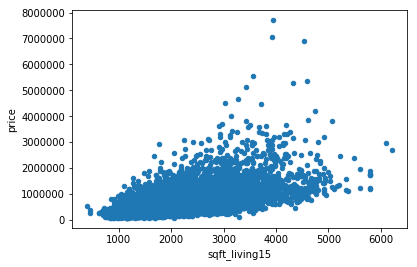

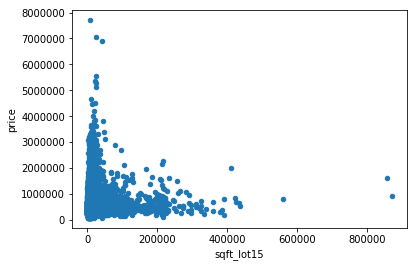

In [12]:
#priceと各特徴量の散布図を確認
df2 = df.drop(['zipcode','id'],axis=1)

for c in df2.columns:
    if (c != 'price') & (c != 'date'):
        df2[[c,'price']].plot(kind='scatter',x=c,y='price')

### 特徴量の選択(1)
- とりあえす、priceと相関の高い特徴量を目見でピックアップする
- sqft_living,grade,sqft_above
- sqft_living15も相関は高めだが、[データの説明](https://www.kaggle.com/harlfoxem/housesalesprediction/data)を見ると、 `Living room area in 2015(implies-- some renovations)
This might or might not have affected the lotsize area` とあり、2015年のsqft_livingデータで古いので除外する
- sqft_living15と同じ理由でsqft_lot15も除外

In [13]:
df.date.head()

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object

In [14]:
#date変換
pd.to_datetime(df.date).head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [15]:
df_en_fin = df.drop(['date','zipcode','sqft_living15','sqft_lot15'],axis=1)

In [16]:
#VIFの計算1
from sklearn.linear_model import LinearRegression
df_vif = df_en_fin.drop(["price"],axis=1)
for cname in df_vif.columns:  
    y=df_vif[cname]
    X=df_vif.drop(cname, axis=1)
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X, y)
    rsquared = regr.score(X,y)
    #print(cname,":" ,1/(1-np.power(rsquared,2)))
    if rsquared == 1:
        print(cname,X.columns[(regr.coef_> 0.5) | (regr.coef_ < -0.5)])

sqft_living Index(['sqft_above', 'sqft_basement'], dtype='object')
sqft_above Index(['sqft_living', 'sqft_basement'], dtype='object')
sqft_basement Index(['sqft_living', 'sqft_above'], dtype='object')


In [17]:
#VIFの計算2
from sklearn.linear_model import LinearRegression

df_en_fin = df_en_fin.drop(['sqft_above','sqft_basement'],axis=1) 

df_vif = df_en_fin.drop(["price"],axis=1)
for cname in df_vif.columns:  
    y=df_vif[cname]
    X=df_vif.drop(cname, axis=1)
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X, y)
    rsquared = regr.score(X,y)
    #print(cname,":" ,1/(1-np.power(rsquared,2)))
    if rsquared == 1:
        print(cname,X.columns[(regr.coef_> 0.5) | (regr.coef_ < -0.5)])

マルチコの消去に成功。

In [18]:
#モデルの訓練
X = df_en_fin.drop(['price'],axis=1)
y = df_en_fin['price']
regr = LinearRegression(fit_intercept=True).fit(X,y)

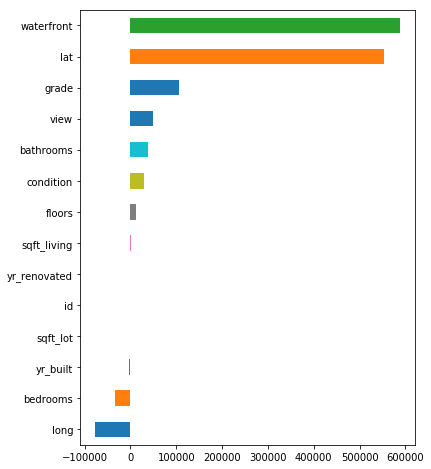

In [19]:
pd.Series(regr.coef_, index=X.columns).sort_values().plot(kind='barh',figsize=(6,8))

In [20]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest,f_regression 

N = len(X)

for k in range(1,len(X.columns)):
    skb = SelectKBest(f_regression,k=k).fit(X,y)
    sup = skb.get_support() #supで選ばれたcolumnをとってくる
    X_selected = X.transpose()[sup].transpose()
    regr = linear_model.LinearRegression()
    model = regr.fit(X_selected,y)
    met = mean_absolute_error(model.predict(X_selected),y)
    #1個の特徴量だと17.4万外す。12個特徴量を使うと12.62万くらいまで改善
    aic = N*np.log((met**2).sum()/N) + 2*k
    print('k:',k,'MAE:',met,'AIC:',aic)

k: 1 MAE: 173688.2733595311 AIC: 305804.0044548065
k: 2 MAE: 164569.38330518242 AIC: 303474.8307791993
k: 3 MAE: 163444.71127356592 AIC: 303180.4089817649
k: 4 MAE: 156939.18551198905 AIC: 301426.72452203906
k: 5 MAE: 156114.47688112353 AIC: 301200.97482906905
k: 6 MAE: 136728.86411972163 AIC: 295471.6527389342
k: 7 MAE: 134969.19673509806 AIC: 294913.7337931207
k: 8 MAE: 134883.02902814746 AIC: 294888.1284219462
k: 9 MAE: 133998.72905029793 AIC: 294605.8035281141
k: 10 MAE: 134099.99251204907 AIC: 294640.4572802865
k: 11 MAE: 127064.92175782408 AIC: 292313.11258888664
k: 12 MAE: 126263.8029551073 AIC: 292041.71858792333
k: 13 MAE: 126373.73432145675 AIC: 292081.3368578998


CrossValidationによるモデル評価

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(np.array(X),np.array(y),test_size=0.2,random_state=42) #テストデータ20％,トレーニングデータ80％

kf = KFold(n_splits=5, random_state=1234, shuffle=True) #トレーニングデータを５つに分割。

df_result = pd.DataFrame()
models = []

for i,(train_index, val_index) in enumerate(kf.split(X_train, y_train)): #
    X_train_train, X_train_val = X_train[train_index], X_train[val_index]
    y_train_train, y_train_val = y_train[train_index], y_train[val_index]

    regr = LinearRegression(fit_intercept=True)
    regr.fit(X_train_train, y_train_train)
    models.append(regr)
    y_pred = regr.predict(X_train_val) #バリデーションデータによる予測をしている
    df = pd.DataFrame({"y_val":y_train_val, "y_pred":y_pred})
    df_result = pd.concat([df_result, df], axis=0) #結果をdf_resultに保存する
    
# validation dataによる評価指標の算出
    y_val = df_result["y_val"]
    y_pred = df_result["y_pred"]
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    print(i)
    print("MSE=%s"%round(mse,3) )
    print("RMSE=%s"%round(np.sqrt(mse), 3) )
    print("MAE=%s"%round(mae,3) )


0
MSE=38910074306.513
RMSE=197256.367
MAE=125107.625
1
MSE=37309891023.538
RMSE=193157.684
MAE=124892.323
2
MSE=41595544352.56
RMSE=203949.857
MAE=126059.906
3
MSE=40691725388.263
RMSE=201721.901
MAE=125903.337
4
MSE=40386093344.125
RMSE=200962.915
MAE=125739.819


In [22]:
#GSCV
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(np.array(X),np.array(y),test_size=0.2,random_state=42) 

df = pd.read_csv("../../day1/1_data/kc_house_data.csv")
X = df.drop(["id", "price", "zipcode", "date", "sqft_living"], axis=1)
y = df["price"]


# 探索したハイパーパラメータ
param_grid = {'n_estimators': [2, 5, 10],
              'max_depth': [2, 5]}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5)

# 最適なパラメータで学習
grid_search.fit(X_train, y_train)

print('test_score : {}'.format(grid_search.score(X_test, y_test)))
print('best_params : {}'.format(grid_search.best_params_))

# 各パラメータのCV平均スコア
display(display(pd.DataFrame(grid_search.cv_results_)\
       [['param_max_depth', 'param_n_estimators', 'mean_train_score']]))

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


test_score : 0.015267175572519083
best_params : {'max_depth': 5, 'n_estimators': 5}


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,param_max_depth,param_n_estimators,mean_train_score
0,2,2,0.010678
1,2,5,0.015374
2,2,10,0.015968
3,5,2,0.018099
4,5,5,0.028951
5,5,10,0.036565


None

### DAY7以降で実施したこと

---

#### 各アルゴリズムの結果確認とアルゴリズムの選定
#### 下記のアルゴリズムで結果確認する
1. 線形回帰
2. ランダムフォレスト
3. 勾配ブースティング
4. k最近傍法

In [23]:
#1.線形回帰

df = pd.read_csv("../../day1/1_data/kc_house_data.csv")
X = df.drop(["id", "price", "zipcode", "date"], axis=1)
y = df["price"]

regr = LinearRegression()
scores = cross_val_score(regr, X, y, cv=10)
print("score: %s"%scores.mean())

score: 0.6908930054058113


In [24]:
#2.ランダムフォレスト回帰

df = pd.read_csv("../../day1/1_data/kc_house_data.csv")
X = df.drop(["id", "price", "zipcode", "date"], axis=1)
y = df["price"]

regr = RandomForestRegressor()
scores = cross_val_score(regr, X, y, cv=10)
print("score: %s"%scores.mean())

score: 0.8654941576890899


In [25]:
#3.勾配ブースティング
from sklearn.ensemble import GradientBoostingClassifier

df = pd.read_csv("../../day1/1_data/kc_house_data.csv")
X = df.drop(["id", "price", "zipcode", "date"], axis=1)
y = df["price"]

gbrt = GradientBoostingClassifier()
scores = cross_val_score(regr, X, y, cv=10)
print("score: %s"%scores.mean())

score: 0.8584746659572602


In [26]:
#4. k最近傍法
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("../../day1/1_data/kc_house_data.csv")
X = df.drop(["id", "price", "zipcode", "date"], axis=1)
y = df["price"]

n_neighbors = KNeighborsClassifier()
scores = cross_val_score(regr, X, y, cv=10)
print("score: %s"%scores.mean())

score: 0.8586726553000679


### ここまでのまとめ-1
- スコアが一番高いのはランダムフォレスト、次いでk最近傍法だった
- k近傍法、ランダムフォレストの2つのアルゴリズムを掘り下げ(予測性能の評価)

In [27]:
#k最近傍法
df = pd.read_csv("../../day1/1_data/kc_house_data.csv")
X = df.drop(["id", "price", "zipcode", "date"], axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_neighbors = KNeighborsClassifier()
n_neighbors.fit(X_train, y_train)

y_pred = n_neighbors.predict(X_train)
display(y_pred[:10])
mae = mean_absolute_error(y_train, y_pred)
print(" MAE(Train data): %s"%round(mae,3))
score = n_neighbors.score(X_train, y_train)
print(" score(Train data): %s"%round(score,3))

y_pred = n_neighbors.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(" MAE(Test data): %s"%round(mae,3))
score = n_neighbors.score(X_test, y_test)
print(" score(Test data): %s"%round(score,3))


array([295000., 257000., 235000., 216600., 305000., 340000., 310000.,
       615000., 385000., 293500.])

 MAE(Train data): 190953.728
 score(Train data): 0.195
 MAE(Test data): 227339.18
 score(Test data): 0.004


In [28]:
#ランダムフォレスト
df = pd.read_csv("../../day1/1_data/kc_house_data.csv")
X = df.drop(["id", "price", "zipcode", "date"], axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regr = RandomForestRegressor()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)
display(y_pred[:10])
mae = mean_absolute_error(y_train, y_pred)
print(" MAE(Train data): %s"%round(mae,3))
score = regr.score(X_train, y_train)
print(" score(Train data): %s"%round(score,3))

y_pred = regr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(" MAE(Test data): %s"%round(mae,3))

score = regr.score(X_test, y_test)
print(" score(Test data): %s"%round(score,3))

array([337980. , 275600. , 214177.5, 288000. , 471400. , 458810. ,
       459595. , 836600. , 649800. , 297260. ])

 MAE(Train data): 29813.58
 score(Train data): 0.975
 MAE(Test data): 78418.414
 score(Test data): 0.849


### ここまでのまとめ-2
- 予測精度の評価比較により、圧倒的にランダムフォレストの精度が高いことがわかった
- しかし、MAEを見るとTrain dataに対してTest dataより精度が高くなっており、overfittingが発生している
- overfittingが発生する理由：訓練データに対して過度に複雑なモデルになっているため

In [29]:
#モデルベース特徴量選択
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
select = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state =42), threshold="median")

In [30]:
df = pd.read_csv("../../day1/1_data/kc_house_data.csv")
X = df.drop(["id", "price", "zipcode", "date"], axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}" .format(X_train.shape))
print("X_train_l1.shape: {}" .format(X_train_l1.shape))

X_train.shape: (17290, 17)
X_train_l1.shape: (17290, 9)


Text(0.5,0,'Sample index')

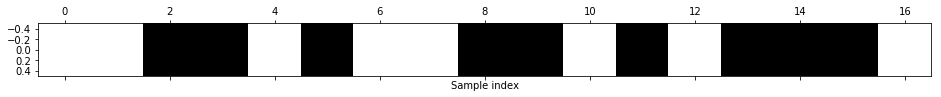

In [31]:
#選択された特徴量を確認 = ランダムフォレストを使ってモデルベース特徴量選択した内容
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r') #maskの可視化 黒：True 白：False
plt.xlabel("Sample index")

In [34]:
#性能の確認。少しだけ性能が向上した
X_test_l1 = select.transform(X_test)
score = RandomForestRegressor().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("score(Test data): {:.3f}".format(score))

score(Text data): 0.857


In [36]:
#反復特徴量選択(RFE)
from sklearn.feature_selection import RFE
select = RFE(RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=aic)

select.fit(X_train, y_train)
#選択された特徴量を可視化。が、getのattributeがないというエラーが出た。よくわからなかったのでコメントアウト
#mask = select.get._support()
#plt.matshow(mask.reshape(1, -1), cmap='gray_r' )
#plt.xlabel("Sample index")

RFE(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
  n_features_to_select=292081.3368578998, step=1, verbose=0)

In [37]:
#RFEのスコアはモデルベース特徴量選択より低くなった
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)
score = RandomForestRegressor().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("score(Test data): {:.3f}" .format(score))

score(Test data): 0.825


In [38]:
#RFE内部で用いられたモデルだけで予測する = 選択された特徴量だけを使用。若干改善した。
print("score(Test data): {:.3f}" .format(select.score(X_test, y_test)))

score(Test data): 0.852


### ここまでのまとめ-3
- ランダムフォレストを使ってモデルベース特徴量選択した場合が一番性能が良かった
- score(Test data): 0.857

In [44]:
#モデルの評価と改良
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

#テストデータ2割、トレーニングデータ8割
X_train,X_test,y_train,y_test = train_test_split(np.array(X),np.array(y),test_size=0.2,random_state=42)

#
kf = KFold(n_splits=5, random_state=1234, shuffle=True)

df_result = pd.DataFrame()
models = []

for i,(train_index, val_index) in enumerate(kf.split(X_train, y_train)): #
    X_train_train, X_train_val = X_train[train_index], X_train[val_index]
    y_train_train, y_train_val = y_train[train_index], y_train[val_index]

    regr = RandomForestRegressor()
    regr.fit(X_train_train, y_train_train)
    models.append(regr)
    y_pred = regr.predict(X_train_val)
    df = pd.DataFrame({"y_val":y_train_val, "y_pred":y_pred})
    df_result = pd.concat([df_result, df], axis=0) #結果をdf_resultに記録
    
    y_val = df_result["y_val"]
    y_pred = df_result["y_pred"]
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    print(i)
    print("MSE=%s"%round(mse,3) )
    print("RMSE=%s"%round(np.sqrt(mse), 3) )
    print("MAE=%s"%round(mae,3) )

0
MSE=16198858149.134
RMSE=127274.735
MAE=73088.96
1
MSE=17089753761.645
RMSE=130727.785
MAE=74078.21
2
MSE=18165979012.502
RMSE=134781.226
MAE=74686.312
3
MSE=18647900941.886
RMSE=136557.317
MAE=74689.383
4
MSE=18313913768.365
RMSE=135328.91
MAE=74454.174


In [50]:
#GridSearch Cross Validation
#import numpy as np
#from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(np.array(X),np.array(y),test_size=0.2,random_state=42) 

#df = pd.read_csv("../../day1/1_data/kc_house_data.csv")
#X = df.drop(["id", "price", "zipcode", "date"], axis=1)
#y = df["price"]


# 探索したハイパーパラメータ
param_grid = {'n_estimators': [100, 300, 500], 'max_depth': [2, 5]}

grid_search = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv=5)

# 最適なパラメータで学習
grid_search.fit(X_train, y_train)

print('score(Test data) : {}'.format(grid_search.score(X_test, y_test)))
print('best params : {}'.format(grid_search.best_params_))

# 各パラメータのGDCV平均スコア
display(display(pd.DataFrame(grid_search.cv_results_)\
       [['param_max_depth', 'param_n_estimators', 'mean_train_score']]))

score(Test data) : 0.7540143145563392
best params : {'max_depth': 5, 'n_estimators': 100}


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,param_max_depth,param_n_estimators,mean_train_score
0,2,100,0.552450
1,2,300,0.551780
2,2,500,0.552233
3,5,100,0.802238
4,5,300,0.802908
5,5,500,0.803028


None

#### トレーニングデータ
- score(Train data) : 0.803028
- best params : {'max_depth': 5, 'n_estimators': 500}

#### テストデータ
- score(Test data) : 0.7540143145563392
- best params : {'max_depth': 5, 'n_estimators': 100}

---

- n_estimatorsを増加させるとスコアが改善する(10,50,100...と徐々に増やすことを試した)。
- ただし、(当然のことながら)増やすとなかなか戻ってこなくなる。

#### 結論

- ランダムフォレストを使ってモデルベース特徴量選択した場合が一番性能が良かった
- score(Test data): 0.857